# LEVEL 2

# TASK 1

## Task: Table Booking and Online Delivery

In [1]:
# import important Libraries
import os
import io
import pandas as pd
import numpy as np
import requests

In [2]:
# URL to the raw CSV file 
url = "https://raw.githubusercontent.com/preethiakshai/Cog_intership/main/Dataset%20.csv"

# Read the CSV file
try:
    data = pd.read_csv(url, on_bad_lines='skip')  # Skipping bad lines if there are any issues
    print(data.head())  # Display the first few rows to ensure it loaded correctly
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [4]:
data.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

### Check for missing values in each column and handle them accordingly.

In [5]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Identify rows with missing values in 'Cuisines' column
missing_cuisines_count = data['Cuisines'].isnull().sum()
print(f"Number of rows with missing 'Cuisines': {missing_cuisines_count}")

Number of rows with missing 'Cuisines': 9


In [7]:
data['Cuisines'].describe()

count             9542
unique            1825
top       North Indian
freq               936
Name: Cuisines, dtype: object

In [8]:
#Calculate the mode of the 'Cuisines' column
cuisines_mode = data['Cuisines'].mode()[0]
print(f"Mode of 'Cuisines': {cuisines_mode}")


Mode of 'Cuisines': North Indian


In [9]:
# Replace missing values with the mode
data['Cuisines'].fillna(cuisines_mode, inplace=True)



In [10]:
# Verify the missing values are handled
print(data.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#### Perform data type conversion if necessary. Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances

In [11]:
# Display data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [12]:
data['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
data['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
data['Switch to order menu'].unique()

array(['No'], dtype=object)

In [16]:
data['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

### Determine the percentage of restaurants thatoffer table booking and online delivery.

In [17]:
# Calculate the percentage of restaurants offering table booking
table_booking_counts = data['Has Table booking'].value_counts(normalize=True) * 100
table_booking_percentages = table_booking_counts.to_dict()
print("Percentage of restaurants offering table booking:")
print(f" {table_booking_percentages.get('Yes', 0):.2f}% of restaurants offering Table Booking")
print(f" {table_booking_percentages.get('No', 0):.2f}% of restaurants does not offering Table Booking")

Percentage of restaurants offering table booking:
 12.12% of restaurants offering Table Booking
 87.88% of restaurants does not offering Table Booking


In [18]:
# Calculate the percentage of restaurants offering online delivery
online_delivery_counts = data['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_percentages = online_delivery_counts.to_dict()

print("Percentage of restaurants offering online delivery:")
print(f" {online_delivery_percentages.get('Yes', 0):.2f}% of restaurants offering online dekivery ")
print(f" {online_delivery_percentages.get('No', 0):.2f}% of restaurants doesnot offering online delivery")

Percentage of restaurants offering online delivery:
 25.66% of restaurants offering online dekivery 
 74.34% of restaurants doesnot offering online delivery


### Compare the average ratings of restaurants with table booking and those without.

In [19]:
# Group by 'Has Table booking' and calculate the mean of 'Aggregate rating'
average_ratings_table_booking = data.groupby('Has Table booking')['Aggregate rating'].mean()
# Print the results
print("Average Aggregate Rating based on Table Booking:")
print(average_ratings_table_booking)


Average Aggregate Rating based on Table Booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


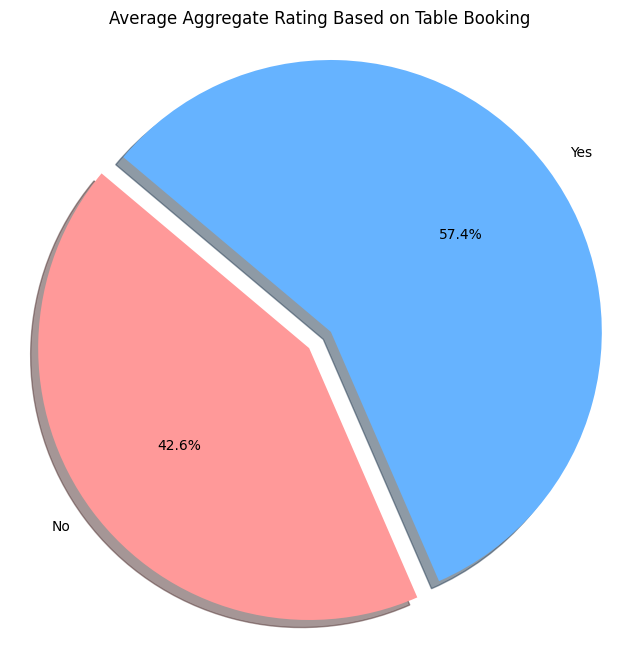

In [20]:
import matplotlib.pyplot as plt

# Prepare data for pie chart
labels = average_ratings_table_booking.index
sizes = average_ratings_table_booking.values
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (if required)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Average Aggregate Rating Based on Table Booking')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on the data analysis, restaurants that offer table booking have an average aggregate rating of 3.44, while those that do not offer table booking have a lower average aggregate rating of 2.56. This indicates that restaurants with table booking tend to receive higher ratings on average compared to those without table booking.

###  Analyze the availability of online delivery among restaurants with different price ranges

In [21]:
# Group by 'Price range' and 'Has Online delivery' and count the number of restaurants in each group
online_delivery_by_price_range = data.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)
online_delivery_by_price_range


Has Online delivery,No,Yes
Price range,,
1,3743,701
2,1827,1286
3,997,411
4,533,53


In [22]:
# Calculate the proportion of restaurants offering online delivery in each price range
online_delivery_proportion = online_delivery_by_price_range.div(online_delivery_by_price_range.sum(axis=1), axis=0)*100
online_delivery_proportion
print("Percentage of online delivery among restarant with price range\n",online_delivery_proportion)

Percentage of online delivery among restarant with price range
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


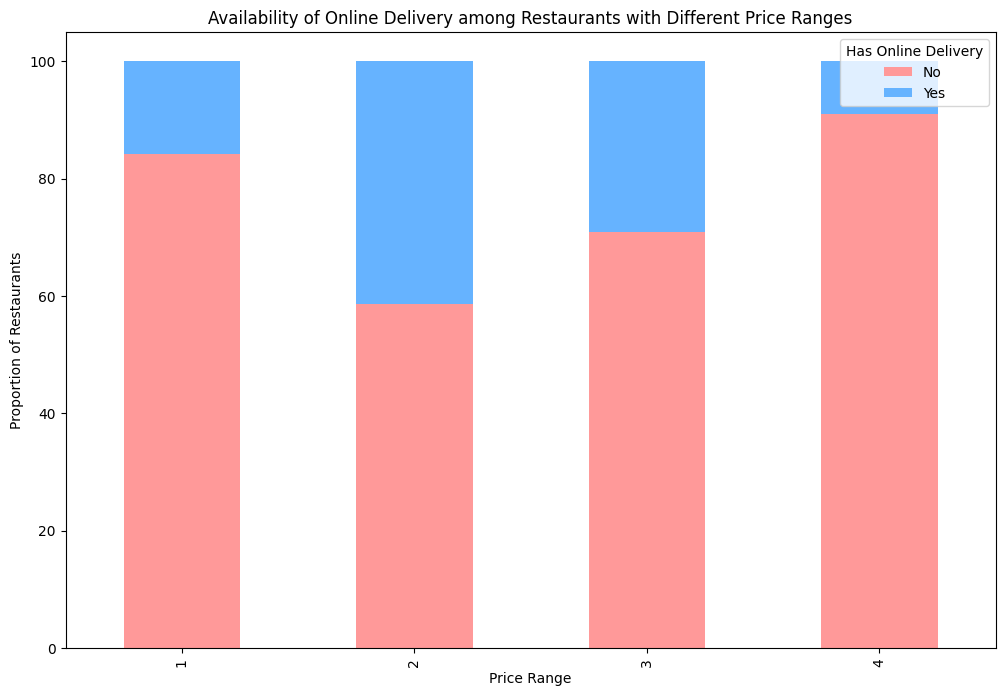

In [23]:
# Visualize the results using a bar plot
online_delivery_proportion.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#ff9999','#66b3ff'])
plt.title('Availability of Online Delivery among Restaurants with Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Proportion of Restaurants')
plt.legend(title='Has Online Delivery')
plt.show()

# Task 2


## Task: Price Range Analysis

### Determine the most common price rangeamong all the restaurants.

In [24]:
# Group by 'Price range' and count the number of restaurants in each group
price_range_counts = data['Price range'].value_counts()
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [25]:
# Identify the most common price range
most_common_price_range = price_range_counts.idxmax()
most_common_price_range_count = price_range_counts.max()

In [26]:
# Print the results
print(f"The most common price range among all the restaurants is {most_common_price_range}, with {most_common_price_range_count} restaurants.")

The most common price range among all the restaurants is 1, with 4444 restaurants.


 ### Calculate the average rating for each price range

In [27]:
# Group by 'Price range' and calculate the mean of 'Aggregate rating'
average_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()

# Print the results
print("Average Aggregate Rating for Each Price Range:")
print(average_rating_by_price_range)

Average Aggregate Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


### Identify the color that represents the highest average rating among different price ranges

In [28]:
# Find the price range with the highest average rating
highest_avg_rating_price_range = average_rating_by_price_range.idxmax()

# Find the corresponding rating color for the highest average rating price range
highest_avg_rating_color = data[data['Price range'] == highest_avg_rating_price_range]['Rating color'].mode()[0]

# Print the results
print(f"The color that represents the highest average rating among different price ranges is '{highest_avg_rating_color}' for the price range {highest_avg_rating_price_range}.")

The color that represents the highest average rating among different price ranges is 'Yellow' for the price range 4.


# TASK 3

## TASK : FEATURE ENGINEERING

In [29]:
# Extract the length of the restaurant name
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)

# Extract the length of the address
data['Address Length'] = data['Address'].apply(len)

# Display the first few rows to verify the new columns
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.

In [37]:
# binary encoding for 'Has  table booking'
data['Has Table Booking']=data['Has Table booking'].apply(lambda x: 1 if x=='Yes' else 0)
print(data[['Has Table booking','Has Table Booking']].head(5))

  Has Table booking  Has Table Booking
0               Yes                  1
1               Yes                  1
2               Yes                  1
3                No                  0
4               Yes                  1


In [39]:
# Binary encoding for 'Has Online Delivery'
data['Has Online Delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
print(data[['Has Online delivery','Has Online Delivery']].head(5))

  Has Online delivery  Has Online Delivery
0                  No                    0
1                  No                    0
2                  No                    0
3                  No                    0
4                  No                    0


In [40]:
# Binary encoding for 'Is delivering now'
data['Is Delivering Now'] = data['Is delivering now'].apply(lambda x: 1 if x == 'Yes' else 0)
print(data[['Is delivering now','Is Delivering Now']].head(5))

  Is delivering now  Is Delivering Now
0                No                  0
1                No                  0
2                No                  0
3                No                  0
4                No                  0
